**LAB 7**

Question 1-Load the image lena from the following url ''https://eeweb.engineering.nyu.edu/~yao/EL5123/image/lena_color.tiff''

Then convert it to gray and show it


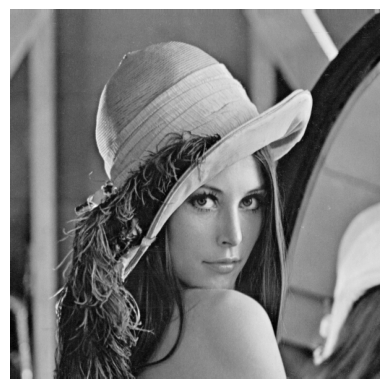

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests

url = 'https://eeweb.engineering.nyu.edu/~yao/EL5123/image/lena_color.tiff'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
img_gray = img.convert('L')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

Question 2- Calculate the Fourier transform of the image after converting it into double.

In [ ]:
image_double = np.array(img_gray).astype(float)
fourier_image = np.fft.fft2(image_double)

 Question 3-Multiply its Fourier transform with a rectangle function of width ∆f in order to recover only the low frequencies (we will build the rectangle function by using the zeros function, then by setting to 1 the values at the center of the image).

In [ ]:
def rectangle(width, height, delta_f):
    rectangle = np.zeros((height, width))
    center_x, center_y = width // 2, height // 2
    rectangle[center_y - delta_f // 2:center_y + delta_f // 2, center_x - delta_f // 2:center_x + delta_f // 2] = 1
    return rectangle

delta_f_low = 1200
rectangle_low = rectangle(image_double.shape[1], image_double.shape[0], delta_f_low)
low_freq = fourier_image * rectangle_low



Question 4-Calculate the inverse Fourier transform of the result (fftshift then fft2) in order to visualize the corresponding low frequency image.

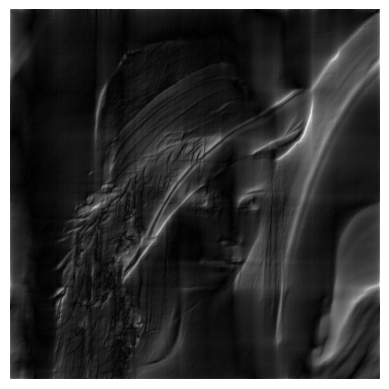

In [ ]:
low_freq_img = np.fft.ifft2(low_freq)
low_freq_img = np.abs(low_freq_img)
plt.imshow(low_freq_img, cmap='gray')
plt.axis('off')
plt.show()

Question 5-Repeat the same operations but this time recovering the high frequencies.

In [ ]:
delta_f_high = 50
rectangle_high = 1 - rectangle(image_double.shape[1], image_double.shape[0], delta_f_high)
filtered_high_freq = fourier_image * rectangle_high

Question 6-Vary ∆f and watch the influence on the corresponding high and low frequency images.

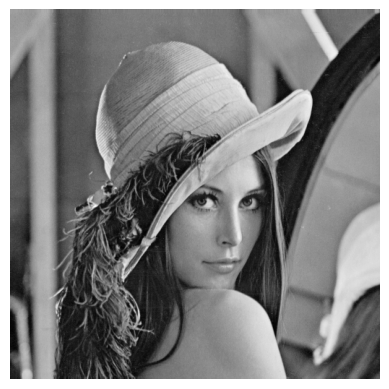

In [ ]:
high_freq_img = np.fft.ifft2(filtered_high_freq)
high_freq_img = np.abs(high_freq_img)
plt.imshow(high_freq_img, cmap='gray')
plt.axis('off')
plt.show()

Question 7- Interpret the resul

Modifying ∆f in the context of Fourier domain operations allows us to control the balance between preserving low or high-frequency information in the image.It offers a way to highlight or diminish specific spatial frequency components, allowing for the manipulation of the image's visual features.